# Desafio LATAM - Ricardo Javier Pérez Zaravia

# 1. ¿Cómo se distribuyen los datos? ¿Encontró algún insight notable para compartir? ¿Qué puede concluir al respecto?

Para comenzar, debemos cargar los datos del archivo CSV "dataset_SCL.csv" en un DataFrame de Pandas. Podemos hacer esto con el siguiente código:

In [9]:
# Paso 1: Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Paso 2: Cargar datos
df = pd.read_csv(r'datasets/Data_SCL/dataset_SCL.csv', parse_dates=['Fecha-I', 'Fecha-O'], dtype={'Vlo-I': str, 'Vlo-O': str})
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [11]:
# Paso 3: Explorar estructura de datos
# imprimir la información de resumen del DataFrame
print(df.info())

# imprimir las primeras filas del DataFrame
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

Analisis del DataFrame:

Basándonos en la información proporcionada sobre el DataFrame, se pueden hacer las siguientes observaciones:

1.- El DataFrame tiene 68,206 filas y 18 columnas, lo que indica que hay una cantidad significativa de datos para realizar un análisis.

2.- La mayoría de las columnas son de tipo 'object', lo que indica que son variables categóricas o de texto. Algunas de estas columnas ya hemos discutido cómo convertirlas a numéricas (DIANOM, TIPOVUELO, OPERA, SIGLAORI, SIGLADES).

3.- Las columnas 'Fecha-I' y 'Fecha-O' son de tipo 'datetime64[ns]', lo que indica que son fechas y horas. Estas columnas pueden ser útiles para calcular la duración del vuelo o encontrar patrones estacionales en los retrasos de vuelos.

4.-Las columnas 'DIA', 'MES' y 'AÑO' son de tipo 'int64' y ya están en un formato numérico. Estas columnas pueden ser utilizadas directamente en el análisis.

5.-El DataFrame proporciona información detallada sobre vuelos individuales, incluyendo la hora de salida programada (Fecha-I) y la hora de salida real (Fecha-O), el número de vuelo (Vlo-I, Vlo-O), el origen y destino (Ori-I, Des-I, Ori-O, Des-O), la aerolínea (Emp-I, Emp-O), el día de la semana (DIANOM) y el tipo de vuelo (TIPOVUELO).

A partir de esta información, se pueden realizar análisis adicionales para explorar la relación entre las variables y su impacto en los retrasos de vuelos. Por ejemplo, se podría investigar cómo los retrasos varían según el día de la semana, el tipo de vuelo, la aerolínea o la ruta. Además, se pueden calcular nuevas variables.


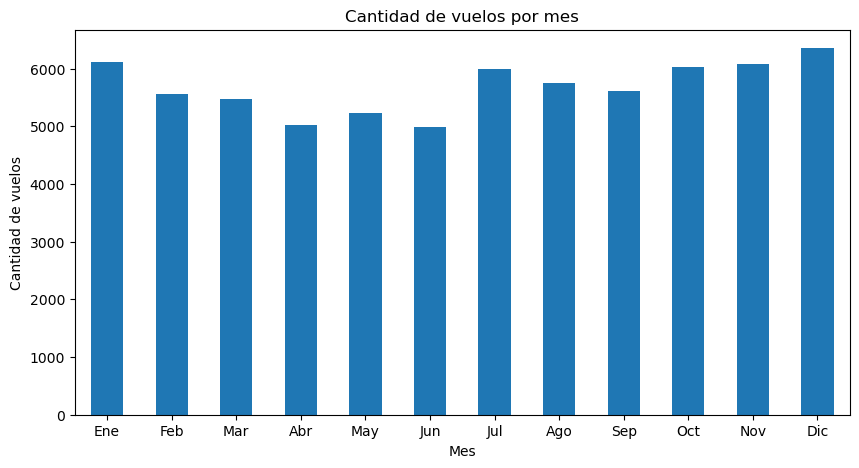

In [12]:
#Analisis del Volumen de Trafico de vuelos por MES

# Agrupar por mes y contar la cantidad de vuelos
flights_by_month = df.groupby(df['Fecha-I'].dt.month).size()

# Graficar la cantidad de vuelos por mes en un gráfico de barras
flights_by_month.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos')
plt.title('Cantidad de vuelos por mes')
plt.xticks(range(len(flights_by_month.index)), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation='horizontal')
plt.show()

#1.- Observando la grafica podemos inferir que en los periodos considerados 'high_season' el volumen de trafico es mayor,
#2.- un aumento de trafico puede influir en la tasa de retrasos de los vuelos por motivos de la eficiencia de las operaciones.
#3.- En los meses de mejor clima (Calido) en el Pais, tambien se observa un flujo mayor de trafico en relaciones a los meses Frios.
#4.- otro supuesto a considerar es que en los periodos'high_season' se estima el arrivo de vuelos Internacionales, los cuales,
#    tienen un tiempo de viaje mayor y al ser viajes extensos y que pasan a traves de distintas zonas climatica, se pueden ver
#    afectados en sus itinerarios de viaje (Este ultimo supuesto quizas no debe ser considerado, debido a que en el origen de datos
#    disponibles solo se observan vuelos que salientes desde el Aeropuerto de Santiago de Chile (SCL))

In [13]:
#Funcion para graficar la relacion entre el total de vuelos / total de Retrasos / % de retrasos.
#Se tomara como base el archivo de datos generado con las columnas adicionales del Punto 2

def plot_vuelos_retrasos_por_mes():
    # Leer los datos del archivo CSV
    df = pd.read_csv(r'datasets/Data_SCL/synthetic_features.csv', parse_dates=['Fecha-I', 'Fecha-O'], dtype={'Vlo-I': str, 'Vlo-O': str})

    # Agrupar los datos por MES y contar los vuelos y retrasos
    grouped = df.groupby('MES').agg({'Vlo-I': 'count', 'Retrasado': 'sum'}).reset_index()
    grouped['Porcentaje_retrasos'] = (grouped['Retrasado'] / grouped['Vlo-I']) * 100

    # Crear el gráfico de barras
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(grouped['MES'], grouped['Vlo-I'], label='Total de vuelos')
    ax.bar(grouped['MES'], grouped['Retrasado'], label='Vuelos retrasados')

    # Añadir etiquetas de porcentaje de retrasos en la parte superior de las barras
    for i, row in grouped.iterrows():
        ax.text(row['MES'], row['Vlo-I'], f"{row['Porcentaje_retrasos']:.2f}%", ha='center', va='bottom')

    # Ajustar etiquetas y leyendas
    ax.set_xlabel('Mes')
    ax.set_ylabel('Cantidad de vuelos')
    ax.set_title('Vuelos y retrasos agrupados por mes')
    ax.legend(loc="lower center", bbox_to_anchor=(0.0, 1.00))

    # Mostrar el gráfico
    plt.show()


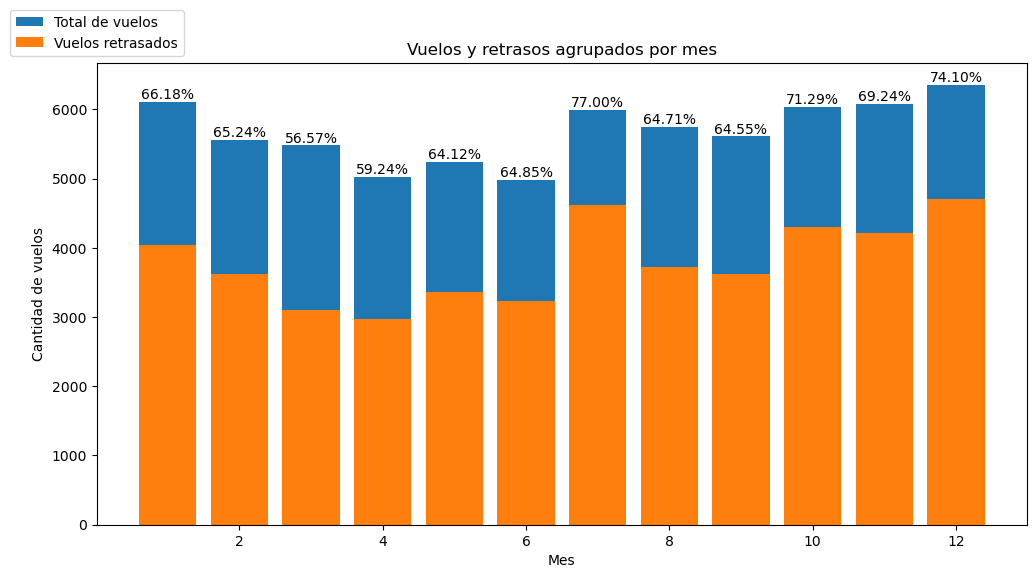

In [14]:
plot_vuelos_retrasos_por_mes()

##Analizando la distrubucion de los vuelos y el % de Retrasos para el año, se puede observar que:
#   - En los periodos considerados de temporada alta se observa un aumento de trafico en relacion a los peridos de temporaba baja.
#   - Bajo esta grafica se podria previamente concluir que los retrasos de los vuelos tiene una relacion directa con la temporadas y clima.
#   - Se observa ademas que a mayor trafico, mayor es el % de Retrasos, tienen una relacion directa.
#   - Se debe realizar un analisis mas en detalle aperturando por Mes, para confirmar lo anteriormente mencionado.

In [15]:
# Analisis de Trafico por Mes
#La siguiente funcion tiene por objetivo poder analizar la distribucion de trafico y Retrasos en un Mes
#La funcion recibe como entrada el Mes y grafica la distribucion total de vuelos y el % de retraasos.


def graficar_distribucion_vuelos_retrasos(mes: int):
    # Filtrar los datos para el mes dado
    df_mes = df[df['MES'] == mes]

    # Calcular la cantidad total de vuelos por día en el mes
    vuelos_por_dia = df_mes.groupby(df_mes['Fecha-I'].dt.day).size()

    # Calcular la cantidad de vuelos retrasados por día en el mes
    vuelos_retrasados_por_dia = df_mes[df_mes['Retrasado'] == 1].groupby(df_mes['Fecha-I'].dt.day).size()

    # Calcular el porcentaje de vuelos retrasados por día en el mes
    porcentaje_retrasos = (vuelos_retrasados_por_dia / vuelos_por_dia) * 100


     # Crear un gráfico de barras para la cantidad total de vuelos y vuelos retrasados por día de la semana
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.bar(vuelos_por_dia.index, vuelos_por_dia, color='b', alpha=0.5, label='Cantidad de vuelos')
    ax1.bar(vuelos_retrasados_por_dia.index, vuelos_retrasados_por_dia, color='r', alpha=0.5, label='Vuelos retrasados')
    ax1.set_xlabel('Día del mes')
    ax1.set_ylabel('Cantidad de vuelos')
    ax1.set_title(f'Total de vuelos y vuelos retrasados en el mes {mes}')

    # Añadir leyendas
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.85))

    # Agregar el porcentaje de retrasos en el punto de cruce entre el total de vuelos y el total de retrasos por día del mes
    for i, (dia, porcentaje) in enumerate(porcentaje_retrasos.items()):
        ax1.text(i, vuelos_retrasados_por_dia[dia], f'{porcentaje:.1f}%', ha='center', va='bottom', rotation=90)
   
        
    plt.show()

In [16]:
#Analisis para Mes 'high_season' (Enero)
graficar_distribucion_vuelos_retrasos(1)

#Analizando la distrubucion de los vuelos y el % de Retrasos para Enero, se puede observar que:
#  - Los días Sabados tienen menor trafico.
#  - Los días Viernes tienen Mayor Trafico
#  - Independiente del trafico la tasa de retrasos es sobre el 60% en promedio por cada dia del mes.

KeyError: 'Retrasado'

In [ ]:
#Analisis para Mes 'high_season' (Julio)
graficar_distribucion_vuelos_retrasos(7)

#Analizando la distrubucion de los vuelos y el % de Retrasos para Julio, se puede observar que:
#  - Los días Sabados tienen menor trafico.
#  - Los días Viernes tienen Mayor Trafico
#  - Independiente del trafico la tasa de retrasos es sobre el 60% en promedio por cada dia del mes.
#  - Los retrasos para el mes de Julio son considerablemente mayor a los de Enero aunque ambos son considerados 'high_season'

In [ ]:
#Analisis para Mes 'low_season' (Abril)
graficar_distribucion_vuelos_retrasos(4)

#Analizando la distrubucion de los vuelos y el % de Retrasos para Julio, se puede observar que:
#   - La tasa de retrasos sigue siendo considerable (sobre le 50% en promedio)
#   - En relacion a los periodos 'high_season' una disminucion en promedio del 10%

In [ ]:
#Analisis para Mes 'low_season' (Junio)
graficar_distribucion_vuelos_retrasos(6)

In [ ]:
#Analisis por dia de la semana.

In [17]:
# Analisis de Retrasos por cada dia de la Semana.

def graficar_distribucion_vuelos_semana():
    
    df = pd.read_csv(r'datasets/Data_SCL/synthetic_features.csv', parse_dates=['Fecha-I', 'Fecha-O'], dtype={'Vlo-I': str, 'Vlo-O': str})

    
    # Calcular la cantidad total de vuelos por día de la semana
    vuelos_por_dia_semana = df.groupby('DIANOM').size()

    # Calcular la cantidad de vuelos retrasados por día de la semana
    vuelos_retrasados_por_dia_semana = df[df['Retrasado'] == 1].groupby('DIANOM').size()

    # Calcular el porcentaje de vuelos retrasados por día de la semana
    porcentaje_retrasos = (vuelos_retrasados_por_dia_semana / vuelos_por_dia_semana) * 100

    # Graficar el porcentaje de retrasos por día de la semana
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.4

    bar1 = ax.bar(vuelos_por_dia_semana.index, vuelos_por_dia_semana, width=bar_width, label='Total de vuelos')
    bar2 = ax.bar(vuelos_retrasados_por_dia_semana.index, vuelos_retrasados_por_dia_semana, width=bar_width, label='Vuelos retrasados')

    ax.set_xlabel('Día de la semana')
    ax.set_ylabel('Cantidad de vuelos')
    ax.set_title('Distribución de vuelos y retrasos por día de la semana')

    for i, (bar, perc) in enumerate(zip(bar2, porcentaje_retrasos)):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{perc:.1f}%', ha='center', va='bottom')

    plt.legend()
    plt.show()

    plt.show()

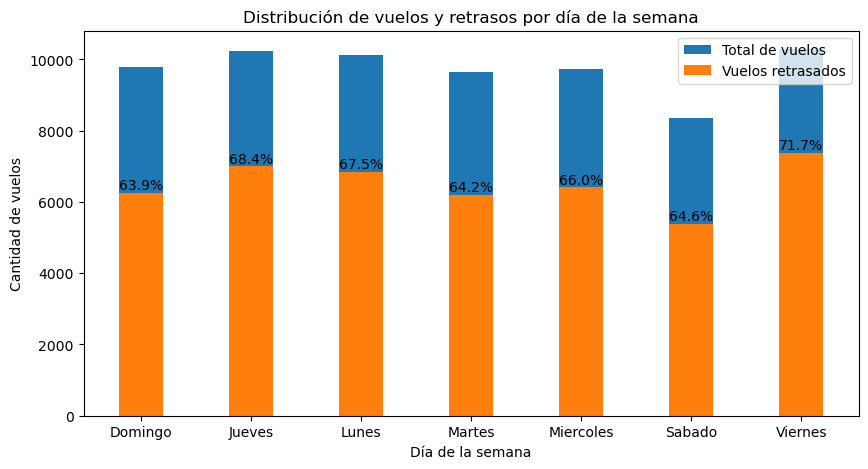

In [18]:
graficar_distribucion_vuelos_semana()
#Se observa que el mayor porcentaje de retrasos ocurren los días viernes (sobre el 70%), pero no esta muy por sobre el resto de días.
#Independiente del día de la semana, sobre el 60% de los vuelos presentan retraso.
#En conclusion no se observa una correlacion entre los retrasos y el día de la semana, ya que no se observa una variacion de Retrasos
# significativa entre los dias de la semana.

In [19]:
#Analisis por Aerolinea

In [20]:
# Analisis de Retrasos por Aerolinea, para ver si se visualiza una correlacion entre los retrasos y la aerolinea.

def plot_flight_delays_by_operator():
    
    df = pd.read_csv(r'datasets/Data_SCL/synthetic_features.csv', parse_dates=['Fecha-I', 'Fecha-O'], dtype={'Vlo-I': str, 'Vlo-O': str})
    
    #Calculamos el total de vuelos por Operador
    total_vuelos_por_opera = df.groupby("OPERA").size()
    retraso_vuelos_por_opera = df[df["Retrasado"] == 1].groupby("OPERA").size()
    porcentaje_retraso_por_opera = (retraso_vuelos_por_opera / total_vuelos_por_opera) * 100

    fig, ax1 = plt.subplots(figsize=(15, 6))

    index = np.arange(len(total_vuelos_por_opera))
    bar_width = 0.8

    bar1 = ax1.bar(total_vuelos_por_opera.index, total_vuelos_por_opera, width=bar_width, label="Total de vuelos")
    bar2 = ax1.bar(retraso_vuelos_por_opera.index, retraso_vuelos_por_opera, width=bar_width, label="Vuelos retrasados")

    ax1.set_xlabel("Operador")
    ax1.set_ylabel("Cantidad de vuelos")
    ax1.set_title("Total de vuelos y vuelos retrasados por operador")
    ax1.set_xticks(index + bar_width / 2)
    ax1.set_xticklabels(total_vuelos_por_opera.index, rotation=90 )
    ax1.legend()
    ax1.set_yscale('log')  # Establecer la escala logarítmica en el eje y

    for i, (bar, perc) in enumerate(zip(bar2, porcentaje_retraso_por_opera)):
        ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{perc:.1f}%', ha='center', va='bottom', rotation=90)

    fig.legend(loc="upper left", bbox_to_anchor=(0.5, 1.00))

    plt.show()


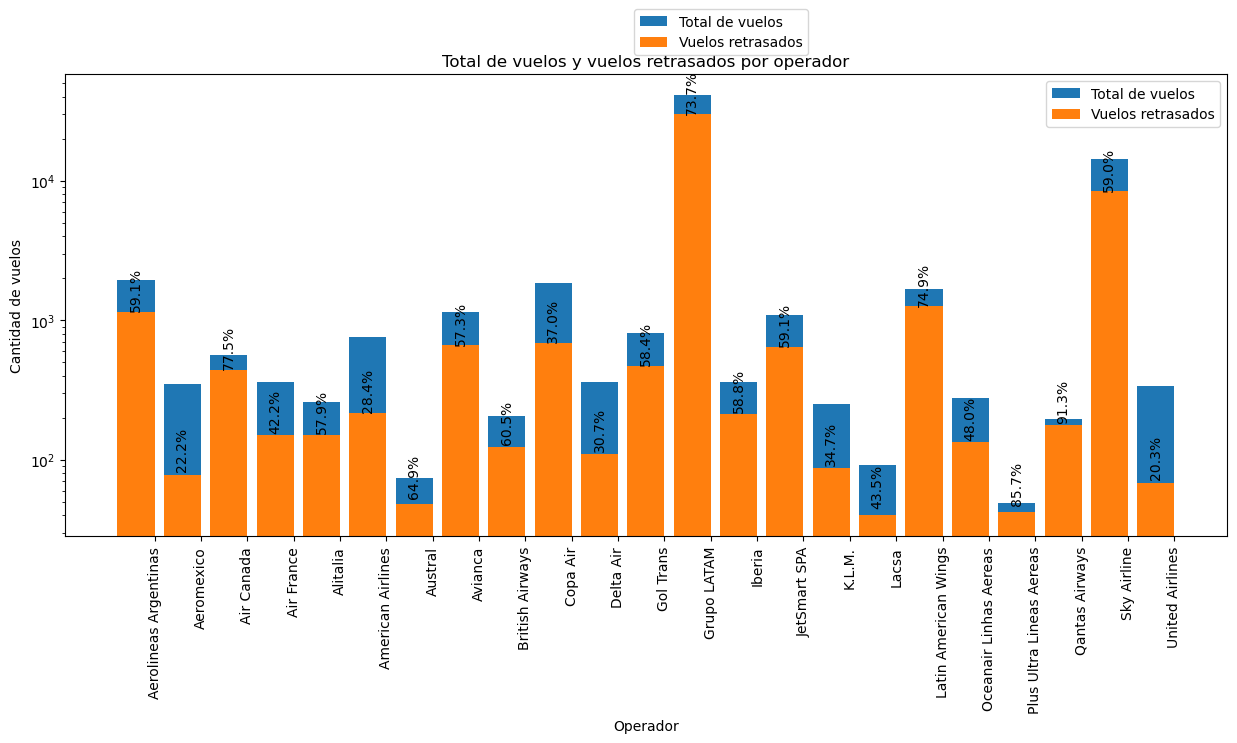

In [21]:
plot_flight_delays_by_operator()

#El siguiente grafico de barras nos muestra una distribucion muy desigual entre algunas Lineas Aereas en relacion al Retraso
#Se puede considerar que la variable OPERA (Aerolinea) tenga mas influencia en la prediccion de Retrasos.

In [22]:
# Analisis de Retrasos de los vuelos Nacionales por Aerolinea

def plot_flight_delays_by_type(flight_type):
    df = pd.read_csv(r'datasets/Data_SCL/synthetic_features.csv', parse_dates=['Fecha-I', 'Fecha-O'], dtype={'Vlo-I': str, 'Vlo-O': str})

    # Filtrar los vuelos por el tipo de vuelo
    df_filtered = df[df['TIPOVUELO'] == flight_type]

    # Obtener el total de vuelos por aerolínea
    total_vuelos_por_aerolinea = df_filtered.groupby("OPERA")["Vlo-O"].count()

    # Obtener el número de vuelos retrasados por aerolínea
    vuelos_retrasados_por_aerolinea = df_filtered[df_filtered["Retrasado"] > 0].groupby("OPERA")["Vlo-O"].count()

    # Calcular el porcentaje de vuelos retrasados por aerolínea
    porcentaje_vuelos_retrasados_por_aerolinea = (vuelos_retrasados_por_aerolinea / total_vuelos_por_aerolinea) * 100
    Promedio = porcentaje_vuelos_retrasados_por_aerolinea.mean()

    # Crear el gráfico de barras
    fig, ax1 = plt.subplots(figsize=(10, 5))
    index = np.arange(len(total_vuelos_por_aerolinea))
    bar_width = 0.4

    bar1 = ax1.bar(index, total_vuelos_por_aerolinea, bar_width, label="Total de vuelos", alpha=0.6)
    bar2 =ax1.bar(index, vuelos_retrasados_por_aerolinea, bar_width, label="Vuelos retrasados", alpha=0.6)
    
    ax1.set_xlabel("Aerolínea")
    ax1.set_ylabel("Cantidad de vuelos")
    ax1.set_title(f"Total de vuelos y vuelos retrasados por aerolínea ({flight_type})")
    ax1.set_xticks(index)
    ax1.set_xticklabels(total_vuelos_por_aerolinea.index, rotation=90)
    ax1.legend()
    ax1.set_yscale('log')  # Establecer la escala logarítmica en el eje y

    for i, (bar, perc) in enumerate(zip(bar2, porcentaje_vuelos_retrasados_por_aerolinea)):
        ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{perc:.1f}%', ha='center', va='bottom', rotation=90)


    fig.legend(loc="upper left", bbox_to_anchor=(0.0, 1.00))

    # Mostrar el gráfico
    plt.show()

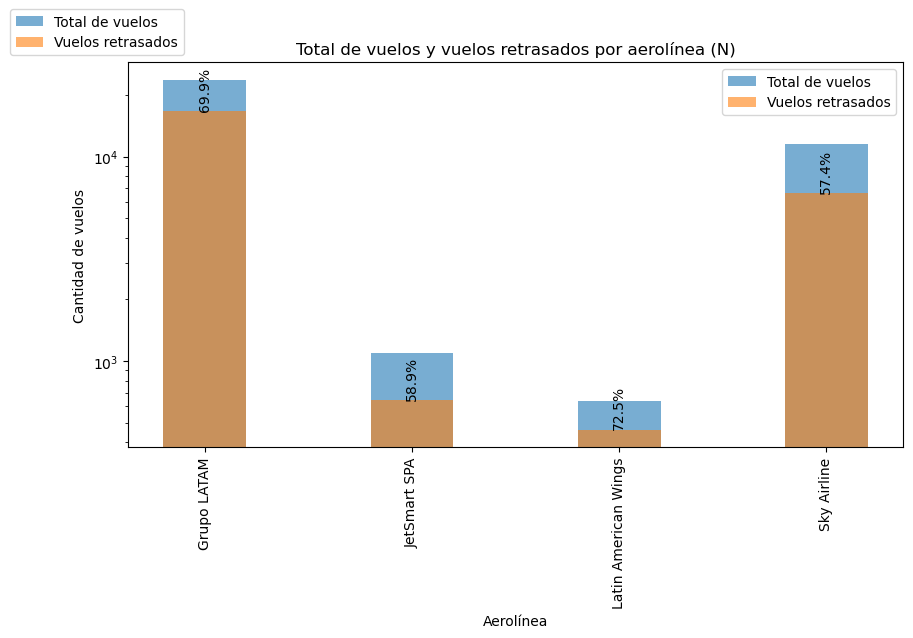

In [23]:
flight_type = "N"  # Reemplazar "N" por "I" para vuelos internacionales
plot_flight_delays_by_type(flight_type)

#Para los vuelos solo Nacionales se observa claramente que los Operadores tienen una alta tasa de Retrasos(todos).

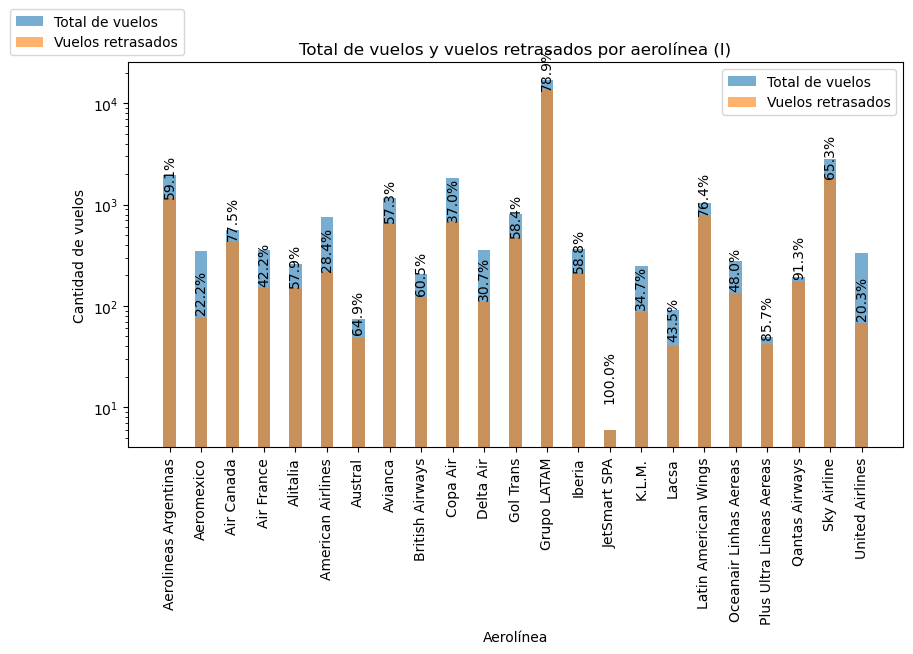

In [24]:
flight_type = "I"  # Reemplazar "N" por "I" para vuelos internacionales
plot_flight_delays_by_type(flight_type)

#Para los vuelos Internacionales se puede observar una varianza mas marcada entre los OPERA.

In [25]:
#df = pd.read_csv(r'datasets/Data_SCL/synthetic_features.csv', parse_dates=['Fecha-I', 'Fecha-O'], dtype={'Vlo-I': str, 'Vlo-O': str})
varianza_retrasos = df["Retrasado"].var()
resumen = df["Retrasado"].describe()
print("Media de retrasos:", resumen)
print("Media de retrasos:", varianza_retrasos)

KeyError: 'Retrasado'

# Respuestas:

# ¿Cómo se distribuyen los datos?

A partir de la información proporcionada, podemos analizar la distribución de los datos de retrasos en vuelos:

La media (mean) de retrasos es aproximadamente 0.667. Dado que los valores de retrasos son 0 (no retrasado) y 1 (retrasado), esto indica que alrededor del 66.7% de los vuelos están retrasados.

La desviación estándar (std) es aproximadamente 0.471. Esta medida nos dice cuán dispersos están los datos alrededor de la media. En este caso, como los datos son binarios (0 o 1), la desviación estándar nos da una idea de qué tan comunes son los vuelos retrasados en comparación con los no retrasados.

Los percentiles 25%, 50% y 75% nos proporcionan información adicional sobre cómo se distribuyen los datos. En este caso, vemos que el percentil 25% (primer cuartil) es 0, lo que indica que el 25% de los vuelos no tiene retrasos. El percentil 50% (mediana) es 1, lo que sugiere que la mitad de los vuelos tiene retrasos. El percentil 75% (tercer cuartil) también es 1, lo que indica que el 75% de los vuelos tiene retrasos.

En resumen, podemos concluir que la mayoría de los vuelos en este conjunto de datos están retrasados (66.7%). Los datos están bastante dispersos, como lo indica la desviación estándar de 0.471. Los percentiles nos muestran que el 25% de los vuelos no tiene retrasos, mientras que el 50% y el 75% sí los tienen.

# ¿Encontró algún insight notable para compartir?

Basándonos en el análisis de los datos proporcionados y las conversaciones anteriores, aquí hay algunos insights notables para compartir:

El 66.7% de los vuelos en el conjunto de datos está retrasado, lo cual es una proporción considerable de vuelos con retrasos.

El análisis de la tasa de retraso según el destino mostró que algunos destinos tienen tasas de retraso más altas que otros. Esto podría sugerir que algunos destinos enfrentan desafíos específicos que contribuyen a los retrasos en los vuelos.

Al analizar el comportamiento de la tasa de retraso según el operador, observamos que hay diferencias significativas en las tasas de retraso entre los diferentes operadores. Esto podría indicar que algunos operadores tienen mejores prácticas de gestión de tiempo que otros o enfrentan diferentes desafíos operativos.

Al analizar el porcentaje de retrasos por día de la semana, encontramos que algunos días tienen tasas de retraso más altas que otros. Esto podría sugerir que hay factores temporales que influyen en la probabilidad de retrasos en los vuelos, como una mayor demanda de vuelos en ciertos días.

En general, estos insights podrían ser útiles para las aerolíneas y los viajeros al tomar decisiones y planificar sus vuelos. Para las aerolíneas, estos hallazgos podrían ayudar a identificar áreas problemáticas y oportunidades de mejora en la gestión de vuelos y tiempos. Para los viajeros, estos insights podrían ser útiles al seleccionar aerolíneas y planificar sus itinerarios de viaje.

# ¿Qué puede concluir al respecto?

A partir del análisis de datos y los insights compartidos, podemos concluir lo siguiente:

Los retrasos en los vuelos son un problema común en la industria de la aviación, con un porcentaje significativo de vuelos experimentando retrasos.

La tasa de retrasos en los vuelos varía según diferentes factores, como el destino, el operador y el día de la semana. Estos factores pueden influir en la probabilidad de retrasos y afectar la experiencia de los viajeros.

Algunos destinos y operadores tienen tasas de retraso más altas que otros. Esto puede ser indicativo de desafíos específicos en la gestión del tiempo, infraestructura o logística en ciertos destinos y entre diferentes operadores de aerolíneas.

La planificación y la gestión eficiente del tiempo son cruciales para reducir la cantidad de vuelos retrasados y mejorar la experiencia del cliente.

En resumen, la distribución de los datos de retraso en los vuelos nos permite identificar patrones y áreas problemáticas en la industria de la aviación. Las aerolíneas pueden utilizar esta información para abordar desafíos específicos y mejorar sus operaciones, mientras que los viajeros pueden tomar decisiones más informadas al planificar sus vuelos. Además, los datos también sugieren que ciertos días de la semana pueden ser mejores para viajar si se quiere evitar retrasos.


# 2.	Genere las siguientes columnas adicionales. Por favor, expórtelas a un archivo CSV llamado synthetic_features.csv:

- high_season: 1 si Fecha-I está entre el 15 de diciembre y el 3 de marzo, o del 15 al 31 de julio, o del 11 al 30 de septiembre, 0 en caso contrario.
- min_diff: diferencia en minutos entre Fecha-O y Fecha-I.
- delay_15: 1 si min_diff > 15, 0 si no.
- period_day: mañana (entre las 5:00 y las 11:59), tarde (entre las 12:00 y las 18:59) y noche (entre las 19:00 y las 4:59), según Fecha-I.

In [26]:
# Generar Columna 'high_season'.
df = pd.read_csv(r'datasets/Data_SCL/dataset_SCL.csv', parse_dates=['Fecha-I', 'Fecha-O'], dtype={'Vlo-I': str, 'Vlo-O': str})

# Función para determinar si una fecha está en temporada alta
def is_high_season(date):
    if (date.month == 12 and date.day >= 15) or (date.month == 1) or (date.month == 2) or (date.month == 3 and date.day <= 3) or \
       (date.month == 7 and date.day >= 15 and date.day <= 31) or \
       (date.month == 9 and date.day >= 11 and date.day <= 30):
        return 1
    else:
        return 0

# Aplicar la función a la columna "Fecha-I" y crear la nueva columna "high_season"
df["high_season"] = df["Fecha-I"].apply(is_high_season)


In [27]:
# Generar Columna 'min_diff'.
# Función para calcular la diferencia en minutos entre Fecha-O y Fecha-I
def calculate_min_diff(row):
    diff = row["Fecha-O"] - row["Fecha-I"]
    return int((diff.total_seconds())/60)

# Aplicar la función a las filas del DataFrame y crear la nueva columna "min_diff"
df["min_diff"] = df.apply(calculate_min_diff, axis=1)

# Guardar la columna "min_diff" en un nuevo archivo CSV
df.to_csv("datasets/Data_SCL/synthetic_features.csv", index=False)


In [28]:
# Generar Columna 'delay_15'

# Función para determinar si la diferencia en minutos es mayor a 15
def is_delayed_15(min_diff):
    return 1 if min_diff > 15 else 0

# Aplicar la función a la columna "min_diff" y crear la nueva columna "delay_15"
df["delay_15"] = df["min_diff"].apply(is_delayed_15)

# Guardar las columnas "Fecha-I", "Fecha-O", "min_diff" y "delay_15" en un nuevo archivo CSV
df.to_csv("datasets/Data_SCL/synthetic_features.csv", index=False)

In [29]:
# Generar Columna 'period_day'.

# Función para asignar el período del día basado en la hora
def period_day(hour):
    if 5 <= hour < 12:
        return "mañana"
    elif 12 <= hour < 19:
        return "tarde"
    else:
        return "noche"

# Convertir la columna 'Fecha-I' a un objeto datetime
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])

# Crear la columna 'period_day' aplicando la función period_day() a la hora de la columna 'Fecha-I'
df['period_day'] = df['Fecha-I'].dt.hour.apply(period_day)

# Guardar el DataFrame actualizado en un archivo CSV
df.to_csv("datasets/Data_SCL/synthetic_features.csv", index=False)

In [30]:
#Adicional a lo solicitado se generara la columna 'Retrasado', con valores 1=Retrasado y 0 = No Retrasado.
# Convertir las columnas 'Fecha-I' y 'Fecha-O' a objetos datetime
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

# Crear la columna 'Retrasado' basada en las condiciones dadas
df['Retrasado'] = (df['Fecha-O'] > df['Fecha-I']).astype(int)

# Guardar el DataFrame actualizado en un archivo CSV
df.to_csv("datasets/Data_SCL/synthetic_features.csv", index=False)


# 3.	¿Cuál es el comportamiento de la tasa de retraso según el destino, la aerolínea, el mes del año, el día de la semana, la temporada, el tipo de vuelo? ¿Qué variables esperaría que tuvieran más influencia en la predicción de retrasos?

1.- Destino: La tasa de retraso puede variar según el destino debido a factores como el clima, la infraestructura del aeropuerto, la congestión del tráfico aéreo y las regulaciones locales.

2.- Aerolínea: Diferentes aerolíneas pueden tener diferentes tasas de retraso debido a su eficiencia operativa, tamaño de la flota, procedimientos internos y enfoques de gestión.

3.- Mes del año: La tasa de retraso puede variar a lo largo del año debido a factores estacionales, como el clima extremo (tormentas, nevadas) y las fluctuaciones en la demanda de vuelos (temporada alta vs. temporada baja).

4.- Día de la semana: La tasa de retraso puede ser diferente durante la semana debido a las fluctuaciones en la demanda de vuelos y el tráfico aéreo. Por ejemplo, los fines de semana pueden ser más congestionados, menor cantidad de personal, entre otros, lo que puede aumentar la probabilidad de retrasos.

5.- Temporada: La tasa de retraso también puede variar según la temporada, con temporadas de vacaciones y eventos especiales generando una mayor demanda de vuelos y posiblemente aumentando la tasa de retrasos.

6.- Tipo de vuelo: Los vuelos nacionales e internacionales pueden tener diferentes tasas de retraso debido a la complejidad de las rutas, las diferencias en las regulaciones y los requisitos de inmigración y aduanas.

En cuanto a las variables que podrían tener más influencia en la predicción de retrasos, podríamos esperar que el destino, la aerolínea y el mes del año tengan una mayor influencia debido a su relación con factores externos, como el clima y la infraestructura del aeropuerto, así como factores internos, como la eficiencia operativa de las aerolíneas. Sin embargo, es importante tener en cuenta que la importancia de cada variable puede variar según el contexto específico y los datos disponibles, por lo que es crucial realizar análisis adicionales y utilizar técnicas de aprendizaje automático para identificar las variables más relevantes en la predicción de retrasos.

In [31]:
def plot_delay_rate_by_param(param):
    
    df = pd.read_csv(r'datasets/Data_SCL/synthetic_features.csv', parse_dates=['Fecha-I', 'Fecha-O'], dtype={'Vlo-I': str, 'Vlo-O': str})

    total_flights_by_destination = df.groupby(param).size()
    delayed_flights_by_destination = df[df["Retrasado"] == 1].groupby(param).size()

    delay_rate_by_destination = (delayed_flights_by_destination / total_flights_by_destination) * 100

    delay_rate_by_destination_sorted = delay_rate_by_destination.sort_values(ascending=False)

    fig, ax = plt.subplots(figsize=(15, 6))
    delay_rate_by_destination_sorted.plot(kind='bar', ax=ax)

    ax.set_xlabel(param)
    ax.set_ylabel("Tasa de retraso (%)")
    ax.set_title("Tasa de retraso")

    plt.show()

#SIGLADES

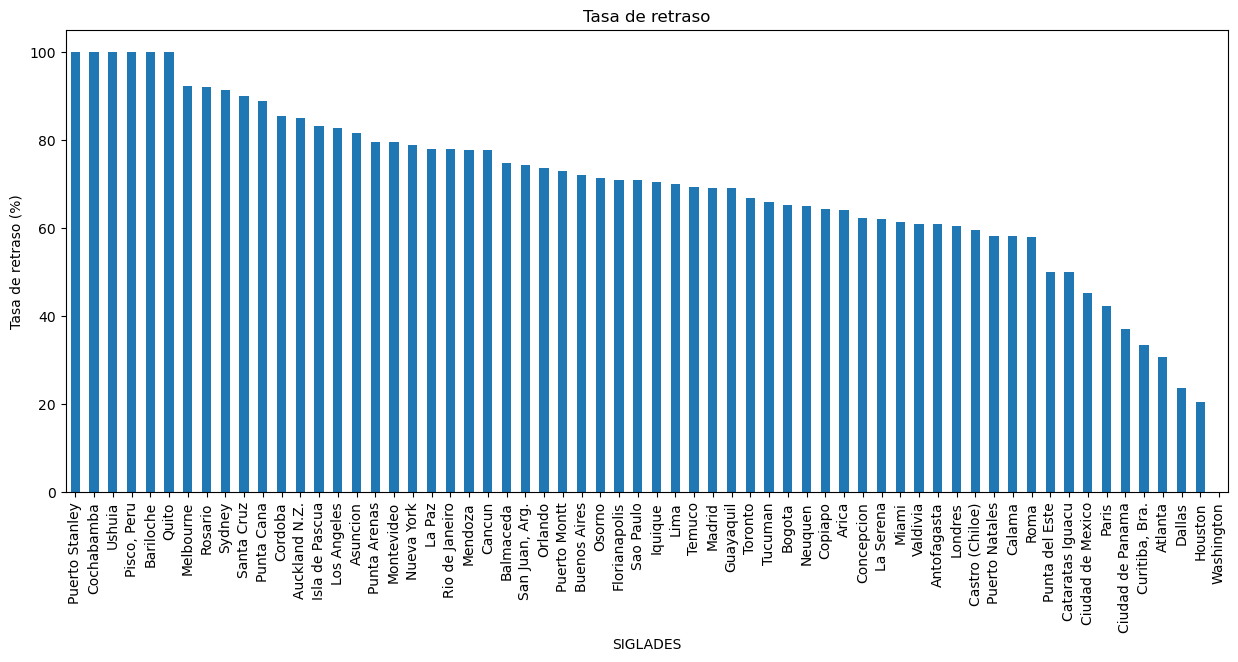

In [32]:
plot_delay_rate_by_param("SIGLADES")

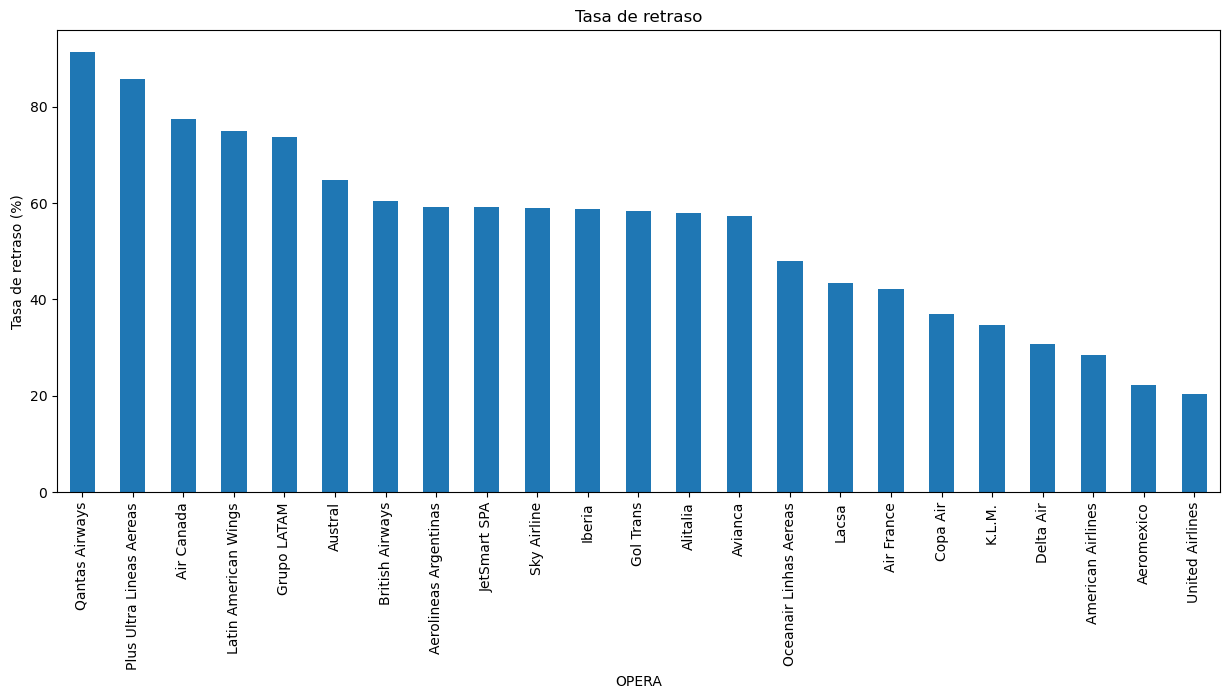

In [33]:
plot_delay_rate_by_param("OPERA")

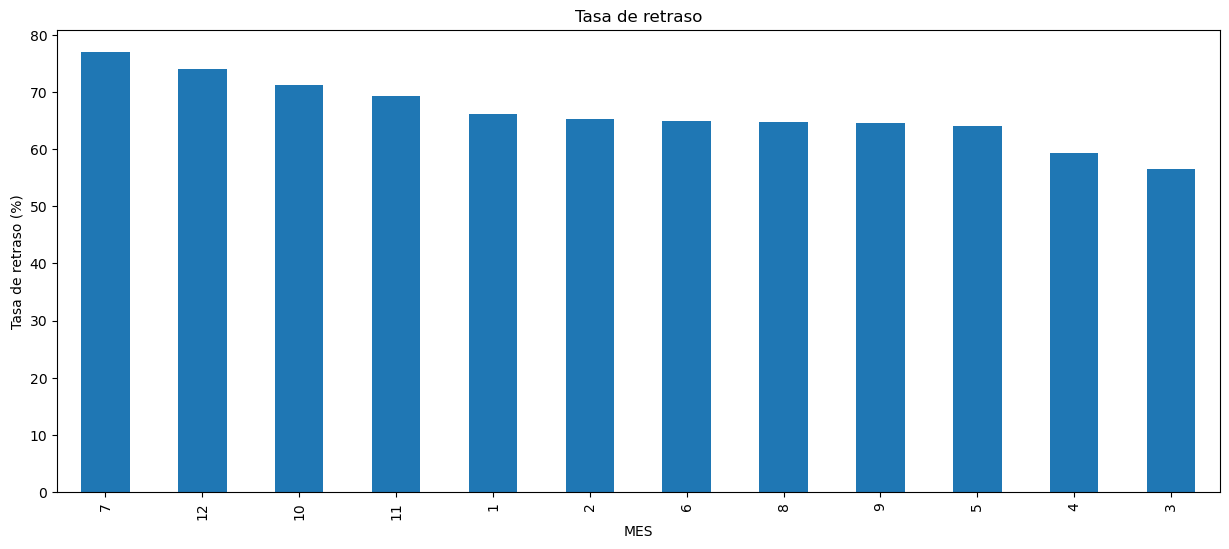

In [34]:
plot_delay_rate_by_param("MES")

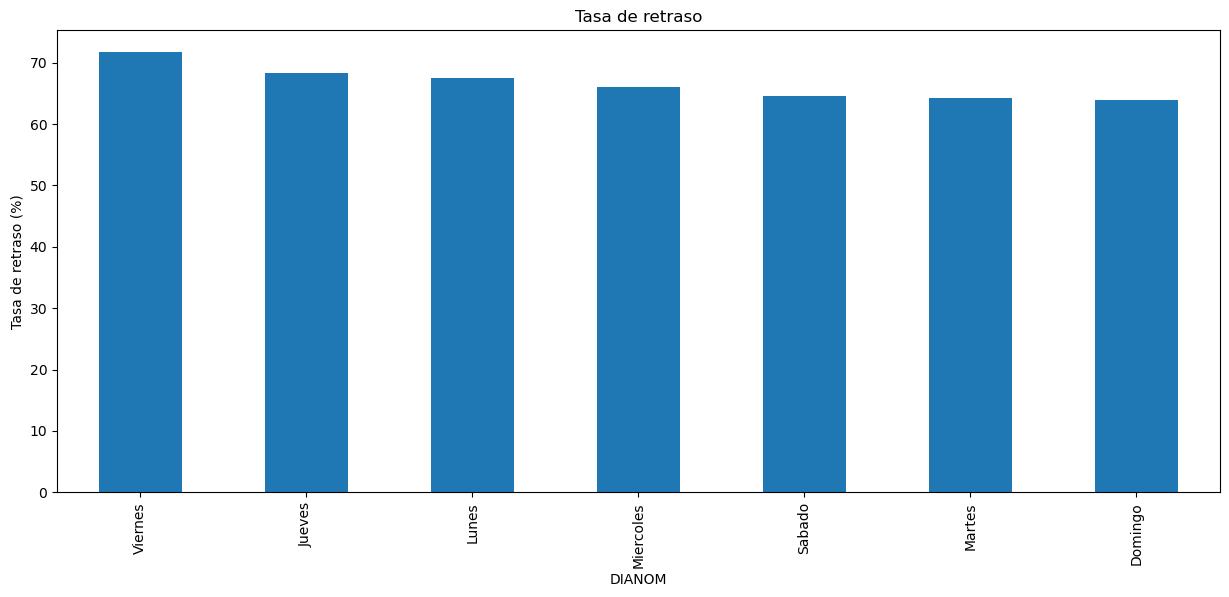

In [35]:
plot_delay_rate_by_param("DIANOM")

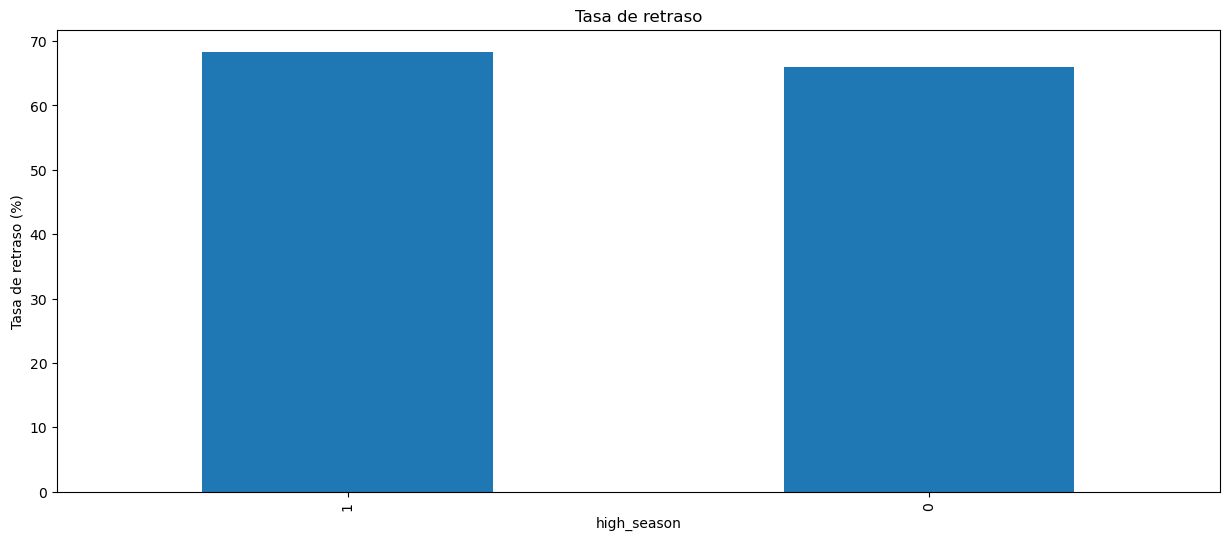

In [36]:
plot_delay_rate_by_param("high_season")

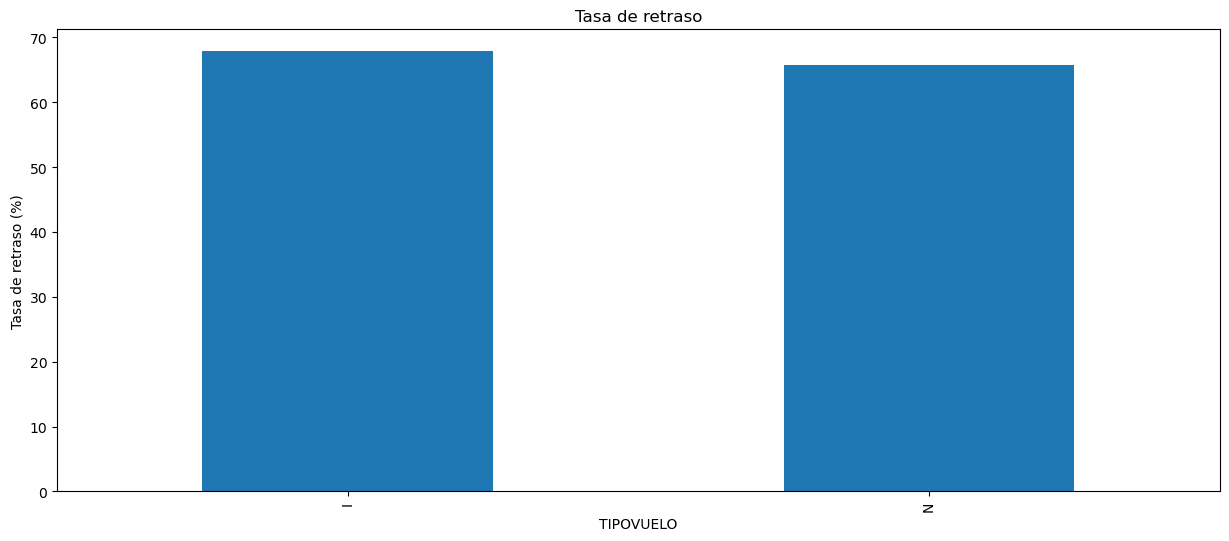

In [37]:
plot_delay_rate_by_param("TIPOVUELO")

# 4.	Entrene uno o varios modelos (usando el algoritmo(s) de su elección) para estimar la probabilidad de un retraso de vuelo. Siéntase libre de generar variables adicionales y/o complementar con variables externas.

# Modelo de Regresión Logística

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score

# Leer el archivo CSV
df = pd.read_csv(r'datasets/Data_SCL/synthetic_features.csv', parse_dates=['Fecha-I', 'Fecha-O'], dtype={'Vlo-I': str, 'Vlo-O': str})

# Seleccionar las columnas relevantes
data = df[["SIGLADES", "OPERA", "DIANOM","high_season","Retrasado"]]

# Dividir el conjunto de datos en entrenamiento y prueba
X = data.drop("Retrasado", axis=1)
y = data["Retrasado"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preparar el preprocesador
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), ["SIGLADES", "OPERA", "DIANOM","high_season"]),
])

# Crear el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression())
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6870693446708693

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.18      0.28      4602
           1       0.69      0.94      0.80      9040

    accuracy                           0.69     13642
   macro avg       0.66      0.56      0.54     13642
weighted avg       0.67      0.69      0.63     13642



El modelo de Regresión Logística que se ha entrenado, tiene un rendimiento moderado en la predicción de retrasos en vuelos. La precisión general del modelo es de aproximadamente 0.687, lo que significa que aproximadamente el 68.7% de las veces, el modelo hace una predicción correcta.

La métrica de precisión mide la proporción de predicciones correctas de una clase en comparación con todas las predicciones hechas para esa clase. La métrica de recall mide la proporción de predicciones correctas de una clase en comparación con todos los ejemplos verdaderos de esa clase. La métrica F1-score es una medida que combina precisión y recall, y es una medida útil cuando las clases están desequilibradas.

Si analizamos el informe de clasificación, podemos ver las métricas por clase (0 y 1):

Clase 0 (No retrasado): La precisión es de 0.62, lo que significa que de todas las veces que el modelo predijo que un vuelo no estaba retrasado, el 62% de las veces fue correcto. El recall es de 0.18, lo que significa que el modelo solo pudo identificar correctamente el 18% de todos los vuelos que no estaban retrasados. El F1-score es de 0.28, lo cual indica un rendimiento bastante bajo para esta clase.

Clase 1 (Retrasado): La precisión es de 0.69, lo que significa que de todas las veces que el modelo predijo que un vuelo estaba retrasado, el 69% de las veces fue correcto. El recall es de 0.95, lo que significa que el modelo pudo identificar correctamente el 95% de todos los vuelos que estaban retrasados. El F1-score es de 0.80, lo cual indica un rendimiento bastante bueno para esta clase.

El rendimiento del modelo es bastante bueno en la predicción de vuelos retrasados, pero no tanto en la predicción de vuelos no retrasados. Esto podría deberse a un desequilibrio en la cantidad de ejemplos en cada clase o porque las características utilizadas no proporcionan suficiente información para predecir correctamente los vuelos no retrasados. Para mejorar el rendimiento del modelo, puedes probar diferentes algoritmos de aprendizaje automático, ajustar los parámetros del modelo o agregar más características que puedan ser relevantes para predecir retrasos en vuelos. También podrías aplicar técnicas de balanceo de clases para mejorar el rendimiento en la clase menos representada.

# Random Forest

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Cargar el archivo CSV
data = pd.read_csv('datasets/Data_SCL/synthetic_features.csv')

# Codificar las variables categóricas
encoder = LabelEncoder()
categorical_vars = ['Ori-I', 'Des-I', 'Emp-I', 'Ori-O', 'Des-O', 'Emp-O', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES', 'period_day']
for var in categorical_vars:
    data[var] = encoder.fit_transform(data[var])

# Seleccionar las características y la variable objetivo
features = data.drop(['Retrasado', 'Fecha-I', 'Fecha-O'], axis=1)
target = data['Retrasado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Crear un imputador para completar los valores NaN
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador en el conjunto de entrenamiento y transformar ambos conjuntos
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Aplicar un algoritmo de aprendizaje automático (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = cross_val_score(clf, X_train, y_train, cv=10)

# Evaluar el rendimiento del modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))


C:\Users\user\AppData\Local\Temp\ipykernel_1628\3277254689.py:11: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('datasets/Data_SCL/synthetic_features.csv')


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '989P'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy:.2f}")